# Plot history

In this file, we are going to plot the results of our simulation.

We will perform the following actions:
* Plot the real values of the PDE function
* Plot the estimated PDE values generated using Monte Carlo simulation

Please run the following codes:

## Table of Content

- [1 - Packages](#1)
- [2 - Plotting the results of our simulation](#2)
    - [2.1 - Load the relevant csv files](#2-1)
    - [2.2 - Plot the PDE in one dimension: fix x in {2, 3, ..., 10} and varies t within [0, x-1]](#2-2)

<a name='1'></a>
## 1 - Packages

Run the cell below to import all the libraries you'll need:

In [1]:
# From system
import os
import shutil
from pathlib import Path
import random

# Data structure
import numpy as np
import pandas as pd
import json
import csv

# Plotting graph
from matplotlib import pyplot as plt

<a name='2'></a>
## 2 - Plotting the results of our simulation

<a name='2-1'></a>
### 2.1 - Load the relevant csv files

In [9]:
np_dictionary = {} 

dir_name = "results"
os_listdir = os.listdir(dir_name)
for file_name in os_listdir:
    file_path = os.path.join(dir_name, file_name)
    data =  pd.read_csv(file_path, delimiter=',', dtype=None, header=None)
    np_dictionary[file_name[:-4]] = data

<a name='2-2'></a>
### 2.2 - Plot the PDE simulated results

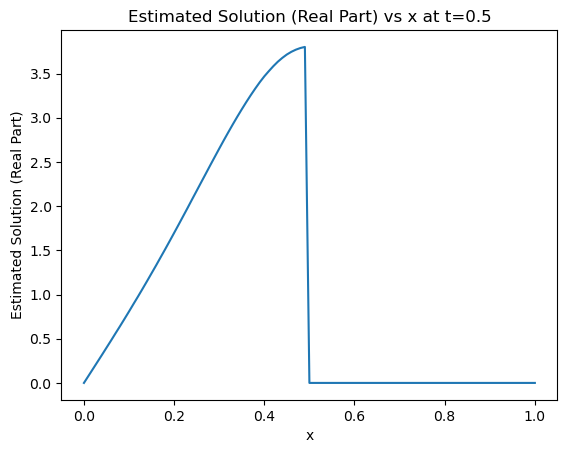

In [10]:
data_array = np_dictionary["monte_carlo_real"].to_numpy()
estimated_solution_vs_x = data_array[0, :].flatten()
# To ChatGPT: The above line extracts the estimated solution at t=0.5 for all x values.
x_values = np.linspace(0, 1, data_array.shape[1])
plt.plot(x_values, estimated_solution_vs_x)
plt.xlabel('x')
plt.ylabel('Estimated Solution (Real Part)')
plt.title('Estimated Solution (Real Part) vs x at t=0.5')
plt.show()

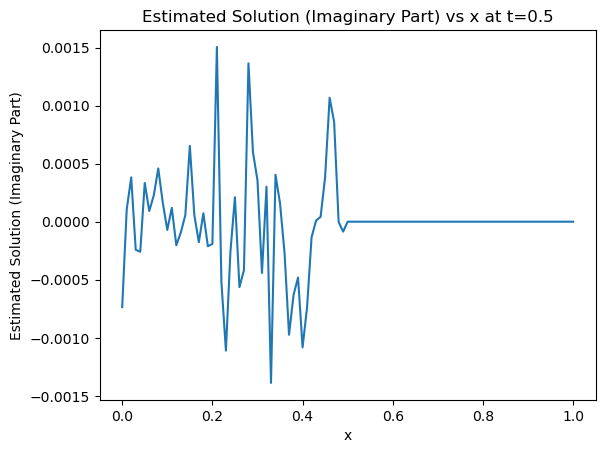

In [11]:
data_array = np_dictionary["monte_carlo_imag"].to_numpy()
estimated_solution_vs_x = data_array[0, :].flatten()
# To ChatGPT: The above line extracts the estimated solution at t=0.5 for all x values.
x_values = np.linspace(0, 1, data_array.shape[1])
plt.plot(x_values, estimated_solution_vs_x)
plt.xlabel('x')
plt.ylabel('Estimated Solution (Imaginary Part)')
plt.title('Estimated Solution (Imaginary Part) vs x at t=0.5')
plt.show()

<a name='3'></a>
## 3 - Finding the bound

We know that for $d=1$, the cubic nonlinear Klein-Gordon equation with a focusing $-u^3$ term and a standard (positive-mass) $-u$ term
\begin{aligned}
\begin{cases}
    \partial_{tt}u(z,t)-(i)^2\Delta u(z,t) = -u(z,t) - (u(z,t))^3 \qquad (z,t) \in \mathbb{C}^2 \times (0,\infty) \\
    u(z,0) = \phi(z) = sin(\pi z_1)sin(\pi z_2)\\
    \partial_t u(z,0) = \psi(z) = -sin(\pi z_1)sin(\pi z_2)
\end{cases}
\end{aligned}

admits a classical solution on the interval $[0,t_0]$ if both sufficient conditions are satisfied:

1. $\phi, \psi \in C^2(\overline{B}_{i}(z_0,t_0))$
2. $e^{3t_0^2} -e^{t_0^2} <  \Big(2 \max (1  , \Vert \phi \Vert_{\infty, \overline{B}_{i}(z_0,t_0)} + t_0 \Vert \psi \Vert_{\infty, \overline{B}_{i}(z_0,t_0)} + t_0 \Vert \nabla\phi \Vert_{\infty, \overline{B}_{i}(z_0,t_0)} )^2
\Big)^{-1}$

where 
$$
\overline{B}_{i}(z_0,t_0) :=\Bigl\{z\in\mathbb{C}^2:\exists y\in\mathbb{R}^2\text{ such that }z=z_0+iy \text{ and } |y|\le t_0 \Bigr\}
$$
given fixed $(z_0, t_0) \in \mathbb{C}^2 \times (0, \infty)$. 

Since our evaluation point is set at some $x=(x_1, x_2)$ where $x_1, x_2 \in \mathbb{R} \cap [0,1]$, it is natural that we take $z_0=x=(x_1, x_2)$. Condition 1 is satisfied so long as the set $\overline{B}_{i}((x_1,x_2),t_0)$ does not contain a pole. Our objective is to find the maximum $t_0$ such that Condition 2 is also satisfied.

Let $a,b \in \mathbb{R}$. Then 
$$
\sin(a+ib) = \sin a \cosh b + i \cos a \sinh b \qquad \cos(a+ib) = \cos a \cosh b - i \sin a \sinh b
$$
Hence the squared modulus are:
$$
|\sin(a+ib)|^2 = \frac{1}{2} (\cosh(2b) - (2a)) \qquad |\cos(a+ib)|^2 = \frac{1}{2} (\cosh(2b) + (2a))
$$

For any $z\in \overline{B}_{i}((x_1,x_2),t_0)$, $z=(z_1,z_2)$ can be written as 
$$
z_1 = x_1 + t_0 i y_1 \qquad z_2 = x_2 + t_0 i y_2
$$
where $(y_1, y_2) \in \mathbb{R}^2\cap B(0,1)$, i.e. $y_1^2+y_2^2\le 1$.

Now set 
$$
a_i = \pi x_i, \quad b_i = \pi t_0 y_i, \quad c_i = \cos(2a_i) = \cos(2\pi x_i) \in [-1,1], \quad \alpha = 2\pi t_0
$$
Then 
$$
|\sin(\pi z_i)| = \sqrt{\frac{1}{2}(\cosh(\alpha|y_i|)-c_i)}, \qquad |\cos(\pi z_i)| = \sqrt{\frac{1}{2}(\cosh(\alpha|y_i|)+c_i)}
$$
(Note: Only $|y_i|$ matters because $\cosh$ is an even function).

Now consider
$$
|\phi(z)| = |\sin(\pi z_1)\sin (\phi z_2)| = \frac{1}{2}\sqrt{\Big(\cosh(\alpha|y_1|)-c_1\Big)\Big(\cosh(\alpha|y_2|)-c_2\Big)}
$$
Our objective is to find 
$$
\Vert \phi \Vert_{\infty, \overline{B}_{i}((x_1,x_2),t_0)} =  \sup_{y_1^2+y_2^2\le 1} \frac{1}{2}\sqrt{\Big(\cosh(\alpha|y_1|)-c_1\Big)\Big(\cosh(\alpha|y_2|)-c_2\Big)} 
$$

First, from $\cosh$ being a strictly increasing function, we know that our objective function is strictly increasing in each $|y_i|$. Thus, any supremum over $\{(y_1, y_2):y_1^2+y_2^2\le 1\}$ is realised on the boundary $y_1^2+y_2^2= 1$. Parameterize, we obtain
$$
|y_1| = \cos\theta, \quad |y_2| = \sin\theta, \quad \theta \in [0, \frac{\pi}{2}]
$$

Thus, the above objective can be translated into
$$
\sup_{\theta \in [0, \frac{\pi}{2}]} \frac{1}{2}\sqrt{\Big(\cosh(\alpha\cos\theta)-c_1\Big)\Big(\cosh(\alpha\sin\theta)-c_2\Big)} 
$$

Next, we observe that $c \in [-1,1]$ and so 
$$
\sup_{\theta \in [0, \frac{\pi}{2}]} \frac{1}{2}\sqrt{\Big(\cosh(\alpha\cos\theta)-c_1\Big)\Big(\cosh(\alpha\sin\theta)-c_2\Big)} \le \sup_{\theta \in [0, \frac{\pi}{2}]} \frac{1}{2}\sqrt{\Big(\cosh(\alpha\cos\theta)+1\Big)\Big(\cosh(\alpha\sin\theta)+1\Big)} 
$$

Differentiate
$$
\Phi(\theta) := \log\Big(\cosh(\alpha\cos\theta)+1\Big) + \log\Big(\cosh(\alpha\sin\theta)+1\Big)
$$
and set $\Phi'(\theta)=0$, the critical points satisfy the condition
$$
\sin\theta \frac{\sinh(\alpha\cos\theta)}{\cosh(\alpha\cos\theta)+1} = \cos\theta \frac{\sinh(\alpha\cos\theta)}{\cosh(\alpha\cos\theta)+1}
$$
and it is obvious that $\theta=\frac{\pi}{4}$ satisfies the above condition. We can check its second derivative and the endpoints $\theta = 0, \frac{\pi}{2}$ to verify $\theta=\frac{\pi}{4}$ maximizes the above function. Therefore, we take $\theta=\frac{\pi}{4}$ (i.e. $|y_1|=|y_2|=\frac{1}{\sqrt{2}}$) and so 
$$
\sup_{\theta \in [0, \frac{\pi}{2}]} \frac{1}{2}\sqrt{\Big(\cosh(\alpha\cos\theta)-c_1\Big)\Big(\cosh(\alpha\sin\theta)-c_2\Big)} \le \frac{1}{2}\Big( \cosh(\frac{\alpha}{\sqrt{2}})+1\Big)
$$

Therefore, we obtain
$$
\Vert \phi \Vert_{\infty, \overline{B}_{i}((x_1,x_2),t_0)} \le \frac{1}{2}\Big(\cosh(\sqrt{2}\pi t_0)+1\Big)
$$
which is a function of $t_0$.

Similarly, 
$$
|\psi(z)| = |-\sin(\pi z_1)\sin (\phi z_2)| = |\phi(z)|
$$
and so
$$
\Vert \psi \Vert_{\infty, \overline{B}_{i}((x_1,x_2),t_0)} = \Vert \phi \Vert_{\infty, \overline{B}_{i}((x_1,x_2),t_0)} \le \frac{1}{2}\Big(\cosh(\sqrt{2}\pi t_0)+1\Big)
$$
which is a function of $t_0$.

Lastly, we have
$$
|\partial_{z_1}\phi(z)| = |\pi \cos(\pi z_1) \sin(\pi z_2)| = \frac{\pi}{2}\sqrt{\Big(\cosh(\alpha|y_1|)+c_1\Big)\Big(\cosh(\alpha|y_2|)-c_2\Big)} \le \frac{\pi}{2}\Big(\cosh(\sqrt{2}\pi t_0)+1\Big)
$$
$$
|\partial_{z_2}\phi(z)| = |\pi \cos(\pi z_1) \sin(\pi z_2)| = \frac{\pi}{2}\sqrt{\Big(\cosh(\alpha|y_1|)-c_1\Big)\Big(\cosh(\alpha|y_2|)+c_2\Big)} \le \frac{\pi}{2}\Big(\cosh(\sqrt{2}\pi t_0)+1\Big)
$$
and so
and so
$$
\Vert \nabla\phi \Vert_{\infty, \overline{B}_{i}((x_1,x_2),t_0)} = \Vert \begin{bmatrix} \partial_{z_1}\phi \\ \partial_{z_2}\phi \end{bmatrix} \Vert_{\infty, \overline{B}_{i}((x_1,x_2),t_0)} = \sup_{z \in \overline{B}_{i}((x_1,x_2),t_0)} \sqrt{|\partial_{z_1}\phi(z)|^2 + |\partial_{z_1}\phi(z)|^2} \le \frac{\pi}{\sqrt{2}}\Big(\cosh(\sqrt{2}\pi t_0)+1\Big)
$$
which is a function of $t_0$.

Remember our overall objective is to determine the $t_0$ such that 
$$
e^{3t_0^2} -e^{t_0^2} <  \Biggl(2 \max\Big(1, \Vert \phi \Vert_{\infty, \overline{B}_{i}((x_1,x_2),t_0)} + t_0 \Vert \psi \Vert_{\infty, \overline{B}_{i}((x_1,x_2),t_0)} + t_0 \Vert \nabla\phi \Vert_{\infty, \overline{B}_{i}((x_1,x_2),t_0)} \Big)^2
\Biggl)^{-1}
$$
is satisfied.

Now if 
$$
e^{3t_0^2} -e^{t_0^2} - \Biggl(2 \max\Big(1, \frac{1}{2}\Big(\cosh(\sqrt{2}\pi t_0)+1\Big) + t_0 \frac{1}{2}\Big(\cosh(\sqrt{2}\pi t_0)+1\Big) + t_0 \frac{\pi}{\sqrt{2}}\Big(\cosh(\sqrt{2}\pi t_0)+1\Big) \Big)^2
\Biggl)^{-1} < 0
$$
is satisfied, then the above objective is also satisfied. 

We can define our objective as finding the maximum $t_0$ such that 
$$
e^{3t_0^2} -e^{t_0^2} - \Biggl(2 \max\Big(1, (\frac{1}{2} + \frac{t_0}{2} + \frac{t_0 \pi}{\sqrt{2}})\Big(\cosh(\sqrt{2}\pi t_0)+1\Big) \Big)^2
\Biggl)^{-1} < 0
$$
is satisfied


Maximum t_0 value found: 0.1948036


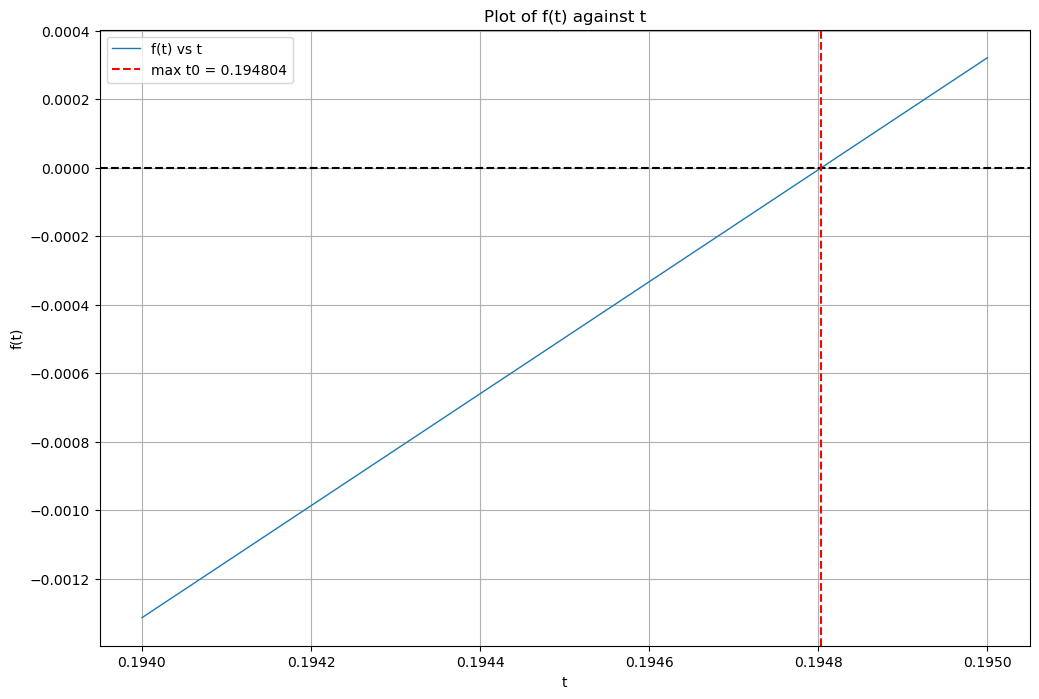

In [5]:
import math
import numpy as np

def bounds_func(t):
    return (1/2 + t/2 + t*math.pi/math.sqrt(2)) * (math.cosh(math.sqrt(2)*math.pi*t) + 1)

def f(t):
    # t is a float scalar; phi_bound and psi_bound are expected to be defined earlier
    return math.exp(3*t**2) - math.exp(t**2) - 1.0/(2*max(1, bounds_func(t))**2)

def generate_T_vector(start=0.0, stop=0.2, steps=10001):
    """Generate a 1D array of t values from start to stop (inclusive) with 'steps' samples."""
    return np.linspace(start, stop, num=steps)

# --- User-adjustable parameters ---
start = 0.194
stop = 0.195
steps = 10001  # e.g. 10001 points gives step size 2e-5 over [0,0.2]

# Build T_vector and evaluate f(t)
T_vector = generate_T_vector(start, stop, steps)
i_values = np.array([f(float(t)) for t in T_vector])

# Find t values where f(t) < 0 and pick the maximum t (largest t that still satisfies the inequality)
valid_mask = i_values < 0
if not np.any(valid_mask):
    print('No t in the chosen range satisfies f(t) < 0')
    max_t_value = None
else:
    max_t_value = float(T_vector[valid_mask].max())
    print('Maximum t_0 value found:', max_t_value)

# Plot i_values against T_vector with a marker for the found maximum t0 (if any)
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
plt.plot(T_vector, i_values, label='f(t) vs t', lw=1)
plt.xlabel('t')
plt.ylabel('f(t)')
plt.title('Plot of f(t) against t')
plt.axhline(0, color='k', linestyle='--')
if max_t_value is not None:
    plt.axvline(max_t_value, color='red', linestyle='--', label=f'max t0 = {max_t_value:.6f}')
plt.legend()
plt.grid(True)
plt.show()